**Domain:** $x \in [0, \, 2], \; \; L = 2$; boundary at $L_1 = 0.75$.  

**Initial conditions:** $\gamma = 1.4,$ symmetry boundary conditions,  
$$
\begin{align*}
\rho_1 = 1.0, \; P_1 = 1.0, \quad x &\leq 0.75; \\
\rho_2 = 0.125, \; P_2 = 0.1, \quad x &> 0.75.
\end{align*}
$$ 
   
**Hydrodynamics equations (1D):**  
$$
\begin{align}
\frac{Dv}{Dt}&= -\frac{1}{\rho} \frac{\partial P}{\partial x} = -\frac{\partial P}{\partial m}, \quad \quad
\quad \quad \text{(conservation of momentum)} \\
\frac{Dx}{Dt} &= v, \quad \quad \quad \quad \quad \quad \quad \quad \quad \; \;
\text{(velocity definition)} \\
\frac{1}{\rho} &= -\frac{\partial x}{\partial m}, \quad \quad 
\quad \quad \quad \quad \quad \quad \text{(continuity equation)} \\
m \frac{De}{Dt} &= - P \frac{DV}{Dt} = - P \frac{D(1/\rho)}{Dt}, \quad \quad
\text{(conservation of energy)} \\
\rho e &= \frac{1}{\gamma - 1} P \quad \quad \quad \quad \quad \quad \quad \; \;
\text{(equation of state)} \\
c_s &= \sqrt{\frac{\gamma P}{\rho}}, \quad \quad \quad \quad \quad \quad \quad \; \;
\text{(sound speed)}
\end{align}
$$

**Numerical discretization:** $N = 200$ grid cells with $\Delta m_i$ constant for each cell.  
$$ 
\text{Initial cell positions:} \quad
x_i = i \Delta x, \; \; x = 0, 1, \ldots, N - 1;
\quad \quad \Delta x = \frac{L}{N-1}. 
$$
Ghost cells: $x_{-1} = - \Delta x$, $x_N = L + \Delta x$.
$$
\begin{align*}
[x_i]^{n=0} &= i \Delta x \\
[v_i]^{n-1/2=0} &= v_0 = 0 \\
[\rho_{i+1/2}]^{n=0} &= 
\begin{cases} 
\rho_1, & x_i \leq L_1 \; \; \rightarrow \; \; i \leq (N-1)(L_1/L) \\
\rho_2, & x_i > L_1
\end{cases} \\
[P_{i+1/2}]^{n=0} &= 
\begin{cases}
P_1, & x_i \leq L_1 \\
P_2, & x_i > L_1
\end{cases} \\
[e_{i+1/2}]^{n=0} &= 1/(\gamma - 1) (P_{i+1/2}/\rho_{i+1/2}) \\
[\Delta m_{i+1/2}]^{n=0} &= \rho_{i+1/2} (x_{i+1} - x_{i}), \quad \quad \quad \,
i = 0, 1, \ldots, N-1. \\
[\Delta m_i]^{n=0} &= \frac{1}{2}(\Delta m_{i-1/2} + \Delta m_{i+1/2}),
\quad 
i = 0, 1, \ldots, N-1. \\
[c_{s, i+1/2}]^{n=0} &= \sqrt{\gamma P_{i+1/2}/\rho_{i+1/2}} \\
[q_{i+1/2}]^{n=0} &= 0.
\end{align*}
$$  
Set ghost cell values ($i = -1$, $i = N$) according to symmetry boundary conditions.  

**Update equations:**
$$
\begin{align*}
v_i^{n+1/2} &= v_i^{n-1/2} - \frac{\Delta t^n}{\Delta m_i} (P_{i+1/2}^n - P_{i-1/2}^n + q_{i+1/2}^n
- q_{i-1/2}^n) \\
x_i^{n+1} &= x_i^n + \Delta t^n v_i^{n+1/2} \\
\rho_{i+1/2}^{n+1} &= \frac{\Delta m_{i+1/2}}{x_{i+1}^{n+1} - x_i^{n+1}} \\
e_{i+1/2}^{n+1} &= e_{i+1/2}^n - (P_{i+1/2}^n + q_{i+1/2}^n) \left(  
\frac{1}{\rho_{i+1/2}^{n+1}} - \frac{1}{\rho_{i+1/2}^n} \right) \\
P_{i+1/2}^{n+1} &= (\gamma - 1) \rho_{i+1/2}^{n+1} e_{i+1/2}^{n+1} \\
c_{s,i+1/2}^{n+1} &= \sqrt{\gamma P_{i+1/2}^{n+1} / \rho_{i+1/2}^{n+1}} \\
q_{i+1/2}^n &= 
\begin{cases}
\frac{c_{s,i+1/2}^n}{\bar{\rho}} [q_0 (v_{i+1}^n - v_i^n)^2 - q_1(v_{i+1}^n - v_i^n)], &
\left( \frac{v_{i+1}^n - v_i^n}{x_{i+1}^n - x_i^n} \right) < 0 \\
0, & \left( \frac{v_{i+1}^n - v_i^n}{x_{i+1}^n - x_i^n} \right) > 0
\end{cases}
\end{align*}
$$

In [1]:
import numpy as np
from math import floor

import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
# Python library to compute Sod Shock solution.
import sodshock

In [3]:
# Initial conditions.
rho_1 = 1.0; rho_2 = 0.125
p_1   = 1.0; p_2   = 0.1

N_c = 200; N_g = 2
a   = 0.0; b   = 2.0
L = b - a
L1  = 0.75

gamma    = 1.4
dustFrac = 0.0

v0 = 0.0

t_final = 0.245

In [4]:
# Analytic solution.
npts = 500

left_state = (p_1, rho_1, v0)
right_state = (p_2, rho_2, v0)

positions, regions, values = sodshock.solve(left_state=left_state, \
                             right_state=right_state, geometry=(a, b, L1), t=t_final, 
                             gamma=gamma, npts=npts, dustFrac=dustFrac)
# Printing positions
print('Positions:')
for desc, vals in positions.items():
    print('{0:10} : {1}'.format(desc, vals))

# Printing p, rho and u for regions
print('Regions:')
for region, vals in sorted(regions.items()):
    print('{0:10} : {1}'.format(region, vals))

Positions:
Head of Rarefaction : 0.4601120906281188
Foot of Rarefaction : 0.7327831609225102
Contact Discontinuity : 0.9772258919119929
Shock      : 1.1792781543473938
Regions:
Region 1   : (1.0, 1.0, 0.0)
Region 2   : RAREFACTION
Region 3   : (0.30313017805064707, 0.42631942817849544, 0.9274526200489506)
Region 4   : (0.30313017805064707, 0.26557371170530725, 0.9274526200489506)
Region 5   : (0.1, 0.125, 0.0)


In [5]:
# Define functions to get specific energy and sound speed from rho, p, gamma.
def get_energy(rho, p, gamma):
    return (1.0 / (gamma - 1.0)) * (p / rho)

def get_cs(rho, p, gamma):
    return np.sqrt(gamma * p / rho)

In [6]:
# Calculate time step according to CFL condition.
def calculate_dt(data, cfl):
    
    N = len(data[:, 0])
    
    x = np.copy(data[:, 0])
    v = np.copy(data[:, 1])
    
    cs = np.copy(data[:, 5])
    
    dt_vals = np.zeros(N)
    dt_vals[1:N-1] = cfl * (np.abs(x[2:N] - x[1:N-1])) / (np.abs(v[1:N-1]) + cs[1:N-1])
    dt_vals[0] = dt_vals[1]; dt_vals[N-1] = dt_vals[N-2]
    
    dt = np.min(dt_vals)
    
    return dt

In [7]:
# Initialize the data arrays according to the initial conditions.
def initialize(N_c, a, b, L1, rho_1, rho_2, p_1, p_2, gamma, v0, q0, q1):
    
    # Total number of grid + ghost cells.
    N_tot = N_c + 2
    
    # Physical domain.
    L  = b - a
    dx = L / (N_c - 1)
    
    # [0], [N_tot-1] = ghost cells; [1] - [N_tot-2] = grid cells.
    x0_vals = a + np.linspace(-1, N_c, num=N_tot) * dx
    v0_vals = np.ones(N_tot) * v0
    
    # Max index such that x_i <= 0.75.
    i_max = floor(L1 / dx) + 1
    
    # Initial energy and sound speed for x <= L1 and x > L1.
    e_1  = get_energy(rho_1, p_1, gamma); e_2  = get_energy(rho_2, p_2, gamma)
    cs_1 = get_cs(rho_1, p_1, gamma);     cs_2 = get_cs(rho_2, p_2, gamma)
    
    # Data: [0]: x_i,    [1]: v_i,  [2]: rho_i.5^n, [3]: p_i.5, [4]: e_i.5, [5]: cs_i.5, 
    #       [6]: dm_i.5, [7]: dm_i, [8]: q_i.5
    data = np.ones((N_tot, 9))
    data[:, 0] = x0_vals
    data[:, 1] = v0_vals
    data[0:(i_max+1), 2] = rho_1; data[(i_max+1):(N_tot), 2] = rho_2
    data[0:(i_max+1), 3] = p_1;   data[(i_max+1):(N_tot), 3] = p_2
    data[0:(i_max+1), 4] = e_1;   data[(i_max+1):(N_tot), 4] = e_2
    data[0:(i_max+1), 5] = cs_1;  data[(i_max+1):(N_tot), 5] = cs_2                     
    
    rho_vals = np.copy(data[:, 2])
    dm_half  = np.zeros(N_tot)
    dm       = np.zeros(N_tot)
    
    # dm_[i+1/2] = rho_[i+1/2] (x_[i+1] - x_[i])
    dm_half[1:N_tot-1] = rho_vals[1:N_tot-1] * (x0_vals[2:N_tot] - x0_vals[1:N_tot-1])
    dm_half[0] = dm_half[1]; dm_half[N_tot-1] = dm_half[N_tot-2]
    
    # dm_[i] = 0.5 * (dm_[i+1/2] - dm_[i-1/2])
    dm[1:N_tot-1] = 0.5 * (dm_half[1:N_tot-1] + dm_half[0:N_tot-2])
    dm[0] = dm[1]; dm[N_tot-1] = dm[N_tot-2]                           
                                 
    data[:, 6] = dm_half
    data[:, 7] = dm
    data[:, 8] = np.zeros(N_tot)
    
    return data

In [8]:
# Update fluid variables with new time step.
def get_update(data, gamma, q0, q1, t, dt, verbose=False):
    
    N = len(data[:, 0])
    d = np.zeros(np.shape(data))
    
    x = np.copy(data[:, 0]); v  = np.copy(data[:, 1]); rho  = np.copy(data[:, 2]); p  = np.copy(data[:, 3])
    e = np.copy(data[:, 4]); cs = np.copy(data[:, 5]); dm_h = np.copy(data[:, 6]); dm = np.copy(data[:, 7])
    q = np.copy(data[:, 8])

    # Update v_i.
    v_new        = np.zeros(N)
    v_new[1:N-1] = v[1:N-1] - (dt / dm[1:N-1]) * (p[1:N-1] - p[0:N-2] + q[1:N-1] - q[0:N-2])
    v_new[0] = -v_new[1]; v_new[N-1] = -v_new[N-2]
    
    # Update x_i.
    x_new = x + dt * v_new
    
    # Update rho_[i+1/2].
    rho_new        = np.zeros(N)
    rho_new[1:N-1] = dm_h[1:N-1] / (x_new[2:N] - x_new[1:N-1])
    rho_new[0] = rho_new[1]; rho_new[N-1] = rho_new[N-2]
    
    # Update e_[i+1/2].
    e_new = e - (p + q) * (1.0 / rho_new - 1.0 / rho)
    
    # Update p_[i+1/2].
    p_new = (gamma - 1.0) * rho_new * e_new
     
    # Update cs_[i+1/2]
    cs_new = np.sqrt(gamma * (p_new + q) / rho_new)        
    
    # Update q_[i+1/2]
    rho_bar      = 0.5 * (1.0 / rho_new + 1.0 / rho) 
    q_new        = np.zeros(N)
    q_new[1:N-1] = ((cs_new[1:N-1] / rho_bar[1:N-1]) * 
                    (q0 * (v_new[2:N] - v_new[1:N-1])**2 - q1 * (v_new[2:N] - v_new[1:N-1])))
    
    # Test where q != 0.
    test        = np.zeros(N)
    test[1:N-1] = (v_new[2:N] - v_new[1:N-1]) / (x_new[2:N] - x_new[1:N-1])
    q_new[test > 0.0] = 0.0
    q_new[0] = q_new[1]; q_new[N-1] = q_new[N-2]
    
    if verbose:
        print('v_new:'); print(v_new)
        print('x_new:'); print(x_new); print('dx_new:'); print(x_new[2:N] - x_new[1:N-1])
        print('rho_new:'); print(rho_new); print('density change:'); print(rho_new - rho)
        print('e_new:'); print(e_new)
        print('p_new:'); print(p_new)
        print('cs_new:'); print(cs_new)
        print('q_new:'); print(q_new); print('(q+p)_new:'); print(q_new + p_new)
    
    # Return new data after timestep.
    d[:, 0] = x_new; d[:, 1] = v_new; d[:, 2] = rho_new; d[:, 3] = p_new; d[:, 4] = e_new; d[:, 5] = cs_new
    d[:, 6] = dm_h;  d[:, 7] = dm;    d[:, 8] = q_new
    
    # Update time.
    t += dt
    
    return t, d

In [9]:
def make_plots(data, positions, values, t, fname):
    
    x = data[:, 0]; v= data[:, 1]; rho = data[:, 2]; p = data[:, 3]; en = data[:, 4]
    
    fig, axs = plt.subplots(2, 2, figsize=(10, 10))
    axs[0, 0].plot(x, rho, linewidth=1.5, color='r')
    axs[0, 1].plot(x, v, linewidth=1.5, color='g')
    axs[1, 0].plot(x, p, linewidth=1.5, color='b')
    axs[1, 1].plot(x, en, linewidth=1.5, color='k')
    
    axs[0, 0].plot(values['x'], values['rho'], linewidth=1.5, linestyle='--', color='r')
    axs[0, 1].plot(values['x'], values['u'], linewidth=1.5, linestyle='--', color='g')
    axs[1, 0].plot(values['x'], values['p'], linewidth=1.5, linestyle='--', color='b')
    axs[1, 1].plot(values['x'], (1.0 / (gamma - 1.0)) * values['p'] / values['rho'], linewidth=1.5,
                   linestyle='--',color='k')
    
    axs[0, 0].set_xlabel(r'$x$')
    axs[0, 0].set_ylabel(r'$\rho$')
    axs[0, 0].set_title('Density')
    axs[0, 0].annotate('t = {0:.5f}'.format(t), xy=(0.8, 0.8))
    
    axs[0, 1].set_xlabel(r'$x$')
    axs[0, 1].set_ylabel(r'$v$')
    axs[0, 1].set_title('Velocity')
    
    axs[1, 0].set_xlabel(r'$x$')
    axs[1, 0].set_ylabel(r'$P$')
    axs[1, 0].set_title('Pressure')
    
    axs[1, 1].set_xlabel(r'$x$')
    axs[1, 1].set_ylabel(r'$e$')
    axs[1, 1].set_title('Specific energy')
    
    # Assume shock has width of ~few dx; calculate shock properties across jump.
    few = 5.0
    N = len(data[:, 0])
    dx = np.zeros(N)
    dx[1:N-1] = data[:, 0][2:N] - data[:, 0][1:N-1]
    dx[0] = dx[1]; dx[N-1] = dx[N-2]
    
    x_shock   = positions['Shock']
    idx_shock = np.argmin(np.abs(data[:, 0] - x_shock))
    idx_L     = np.argmin(np.abs(data[:, 0] - x_shock + few * dx))
    idx_R     = np.argmin(np.abs(data[:, 0] - x_shock - few * dx))

    x_L   = data[:, 0][idx_L]; x_R   = data[:, 0][idx_R]; x_c   = data[:, 0][idx_shock]
    v_L   = data[:, 1][idx_L]; v_R   = data[:, 1][idx_R]; v_c   = data[:, 1][idx_shock]
    rho_L = data[:, 2][idx_L]; rho_R = data[:, 2][idx_R]; rho_c = data[:, 2][idx_shock]
    p_L   = data[:, 3][idx_L]; p_R   = data[:, 3][idx_R]; p_c   = data[:, 3][idx_shock]

    print('shock at i = {0:d}\t (i_L = {1:d},\t i_R = {2:d})'.format(idx_shock, idx_L, idx_R))
    print('shock at x = {0:.3f}\t (x_L = {1:.3f},\t x_R = {2:.3f})'.format(data[:, 0][idx_shock], 
                                                                           data[:, 0][idx_L], 
                                                                           data[:, 0][idx_R]))

    print('\nLEFT:\t v :{0:.5f}\t rho: {1:.5f}\t p:{2:.5f}'.format(v_L, rho_L, p_L))
    print('CENTER:\t v :{0:.5f}\t rho: {1:.5f}\t p:{2:.5f}'.format(v_c, rho_c, p_c))
    print('RIGHT:\t v :{0:.5f}\t rho: {1:.5f}\t p:{2:.5f}'.format(v_R, rho_R, p_R))


    # Velocity, density, pressure jumps.
    dv = np.abs(v_R - v_L)
    drho = np.abs(rho_R - rho_L)
    dp = np.abs(p_R - p_L)

    print('\nNUMERICAL SOLUTION:')
    print('JUMP:\t v :{0:.5f}\t rho :{1:.5f}\t p :{2:.5f}'.format(dv, drho, dp))

    print('\nANALYTIC SOLUTION:')
    dv_a = regions['Region 4'][2] - regions['Region 5'][2]
    drho_a = regions['Region 4'][1] - regions['Region 5'][1]
    dp_a = regions['Region 4'][0] - regions['Region 5'][0]
    print('JUMP:\t v :{0:.5f}\t rho :{1:.5f}\t p :{2:.5f}'.format(dv_a, drho_a, dp_a))
    
    print('\nDIFFERENCE:')
    print('v_err = {0:.5f}\t rho_err = {1:.5f}\t p_err={2:.5f}'.format(np.abs(dv - dv_a) / dv_a,
                                                                       np.abs(drho - drho_a) / drho_a,
                                                                       np.abs(dp - dp_a) / dp_a))
    
    axs[0, 0].axvline(x=x_L, linewidth=1.5, linestyle='--', color='r')
    axs[0, 0].axvline(x=x_R, linewidth=1.5, linestyle='--', color='r')
    axs[0, 1].axvline(x=x_L, linewidth=1.5, linestyle='--', color='g')
    axs[0, 1].axvline(x=x_R, linewidth=1.5, linestyle='--', color='g')
    axs[1, 0].axvline(x=x_L, linewidth=1.5, linestyle='--', color='b')
    axs[1, 0].axvline(x=x_R, linewidth=1.5, linestyle='--', color='b')
    axs[1, 1].axvline(x=x_L, linewidth=1.5, linestyle='--', color='k')
    axs[1, 1].axvline(x=x_R, linewidth=1.5, linestyle='--', color='k')
    
    plt.tight_layout()
    #plt.show()
    plt.savefig(fname)
    
    return

shock at i = 118	 (i_L = 113,	 i_R = 123)
shock at x = 1.182	 (x_L = 1.156,	 x_R = 1.226)

LEFT:	 v :0.92313	 rho: 0.26468	 p:0.30013
CENTER:	 v :0.57066	 rho: 0.17552	 p:0.16491
RIGHT:	 v :0.00720	 rho: 0.12530	 p:0.10033

NUMERICAL SOLUTION:
JUMP:	 v :0.91592	 rho :0.13939	 p :0.19980

ANALYTIC SOLUTION:
JUMP:	 v :0.92745	 rho :0.14057	 p :0.20313

DIFFERENCE:
v_err = 0.01243	 rho_err = 0.00844	 p_err=0.01640


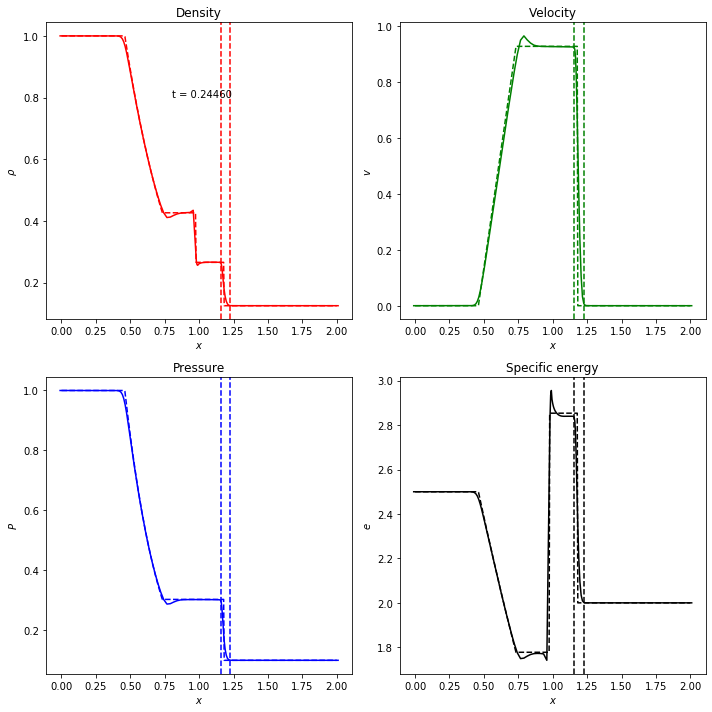

In [10]:
# Base case: N = 200, q0 = 4.0, q1 = 0.5, C = 0.5
t  = 0.0
dt = 0.0
q0 = 4.0; q1 = 0.5

cfl = 0.5
N_c = 200

fname = '/home/nina/Downloads/shock_N_200_q0_4_q1_05_C_05.png'

data = initialize(N_c, a, b, L1, rho_1, rho_2, p_1, p_2, gamma, v0, q0, q1)
t_vals = np.asarray([t])

while (t + dt) < 0.245:
    
    data_0 = data
    
    dt = calculate_dt(data_0, cfl)
    t, data_1 = get_update(data_0, gamma, q0, q1, t, dt)
     
    data = data_1
    np.append(t_vals, t)
    
make_plots(data, positions, values, t, fname)

/home/nina/.local/lib/python3.6/site-packages/ipykernel_launcher.py:31: RuntimeWarning: invalid value encountered in sqrt
/home/nina/.local/lib/python3.6/site-packages/ipykernel_launcher.py:42: RuntimeWarning: invalid value encountered in greater


shock at i = 0	 (i_L = 0,	 i_R = 0)
shock at x = nan	 (x_L = nan,	 x_R = nan)

LEFT:	 v :nan	 rho: nan	 p:nan
CENTER:	 v :nan	 rho: nan	 p:nan
RIGHT:	 v :nan	 rho: nan	 p:nan

NUMERICAL SOLUTION:
JUMP:	 v :nan	 rho :nan	 p :nan

ANALYTIC SOLUTION:
JUMP:	 v :0.92745	 rho :0.14057	 p :0.20313

DIFFERENCE:
v_err = nan	 rho_err = nan	 p_err=nan


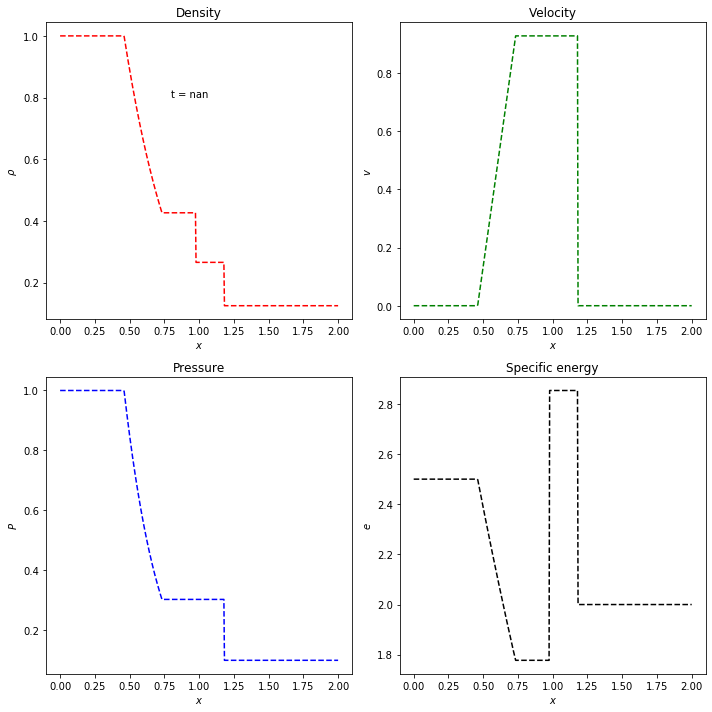

In [11]:
#Double q0, q1; N = 200, C = 0.5
q0 = 8.0; q1 = 1.0

cfl = 0.5
N_c = 200

t = 0.0

fname = '/home/nina/Downloads/shock_N_200_q0_8_q1_1_C_05.png'

data = initialize(N_c, a, b, L1, rho_1, rho_2, p_1, p_2, gamma, v0, q0, q1)
t_vals = np.asarray([t])

while (t + dt) < 0.245:
    
    data_0 = data
    
    dt = calculate_dt(data_0, cfl)
    t, data_1 = get_update(data_0, gamma, q0, q1, t, dt)
     
    data = data_1
    np.append(t_vals, t)
    
make_plots(data, positions, values, t, fname)

shock at i = 118	 (i_L = 113,	 i_R = 123)
shock at x = 1.181	 (x_L = 1.156,	 x_R = 1.226)

LEFT:	 v :0.92655	 rho: 0.26655	 p:0.30252
CENTER:	 v :0.60622	 rho: 0.17507	 p:0.16392
RIGHT:	 v :0.00018	 rho: 0.12501	 p:0.10001

NUMERICAL SOLUTION:
JUMP:	 v :0.92638	 rho :0.14155	 p :0.20251

ANALYTIC SOLUTION:
JUMP:	 v :0.92745	 rho :0.14057	 p :0.20313

DIFFERENCE:
v_err = 0.00116	 rho_err = 0.00692	 p_err=0.00304


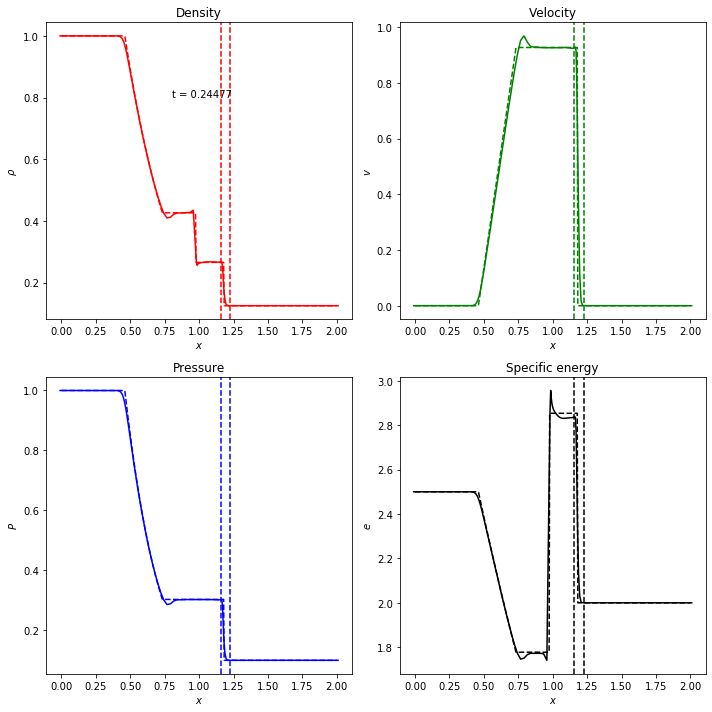

In [12]:
# Halve q0, q1; N = 200, C = 0.5
t  = 0.0
dt = 0.0

q0 = 2.0; q1 = 0.25

cfl = 0.5
N_c = 200

fname = '/home/nina/Downloads/shock_N_200_q0_2_q1_025_C_05.png'

data = initialize(N_c, a, b, L1, rho_1, rho_2, p_1, p_2, gamma, v0, q0, q1)
t_vals = np.asarray([t])

while (t + dt) < 0.245:
    
    data_0 = data
    
    dt = calculate_dt(data_0, cfl)
    t, data_1 = get_update(data_0, gamma, q0, q1, t, dt)
     
    data = data_1
    np.append(t_vals, t)
    
make_plots(data, positions, values, t, fname)

shock at i = 58	 (i_L = 53,	 i_R = 64)
shock at x = 1.179	 (x_L = 1.130,	 x_R = 1.273)

LEFT:	 v :0.92042	 rho: 0.26432	 p:0.29996
CENTER:	 v :0.79785	 rho: 0.22047	 p:0.23108
RIGHT:	 v :0.02200	 rho: 0.12593	 p:0.10104

NUMERICAL SOLUTION:
JUMP:	 v :0.89843	 rho :0.13839	 p :0.19892

ANALYTIC SOLUTION:
JUMP:	 v :0.92745	 rho :0.14057	 p :0.20313

DIFFERENCE:
v_err = 0.03130	 rho_err = 0.01556	 p_err=0.02073


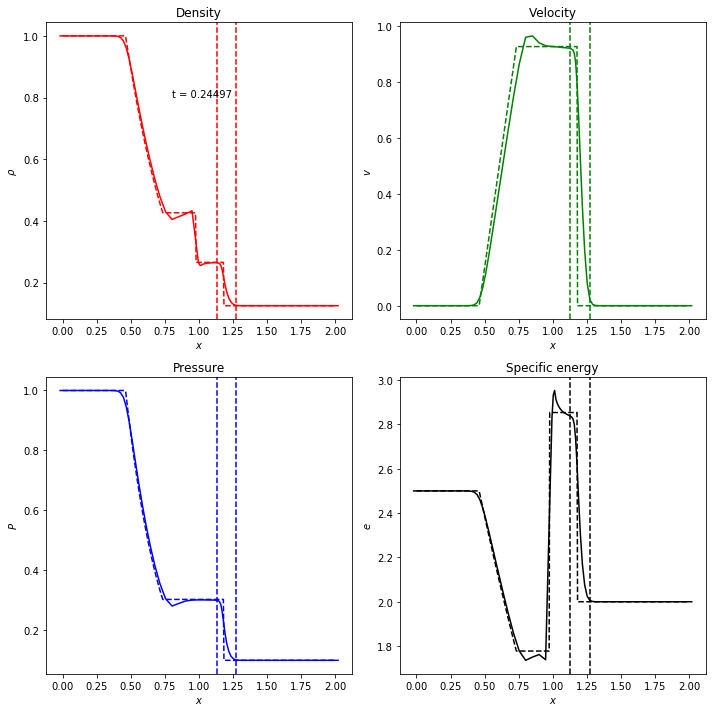

In [13]:
# N = 100.
t  = 0.0
dt = 0.0
q0 = 4.0; q1 = 0.5

cfl = 0.5
N_c = 100

fname = '/home/nina/Downloads/shock_N_100_q0_4_q1_05_C_05.png'

data = initialize(N_c, a, b, L1, rho_1, rho_2, p_1, p_2, gamma, v0, q0, q1)
t_vals = np.asarray([t])

while (t + dt) < 0.245:
    
    data_0 = data
    
    dt = calculate_dt(data_0, cfl)
    t, data_1 = get_update(data_0, gamma, q0, q1, t, dt)
     
    data = data_1
    np.append(t_vals, t)
    
make_plots(data, positions, values, t, fname)

shock at i = 236	 (i_L = 231,	 i_R = 241)
shock at x = 1.181	 (x_L = 1.167,	 x_R = 1.203)

LEFT:	 v :0.92464	 rho: 0.26463	 p:0.30021
CENTER:	 v :0.54053	 rho: 0.17111	 p:0.15875
RIGHT:	 v :0.00523	 rho: 0.12521	 p:0.10024

NUMERICAL SOLUTION:
JUMP:	 v :0.91941	 rho :0.13942	 p :0.19997

ANALYTIC SOLUTION:
JUMP:	 v :0.92745	 rho :0.14057	 p :0.20313

DIFFERENCE:
v_err = 0.00867	 rho_err = 0.00824	 p_err=0.01555


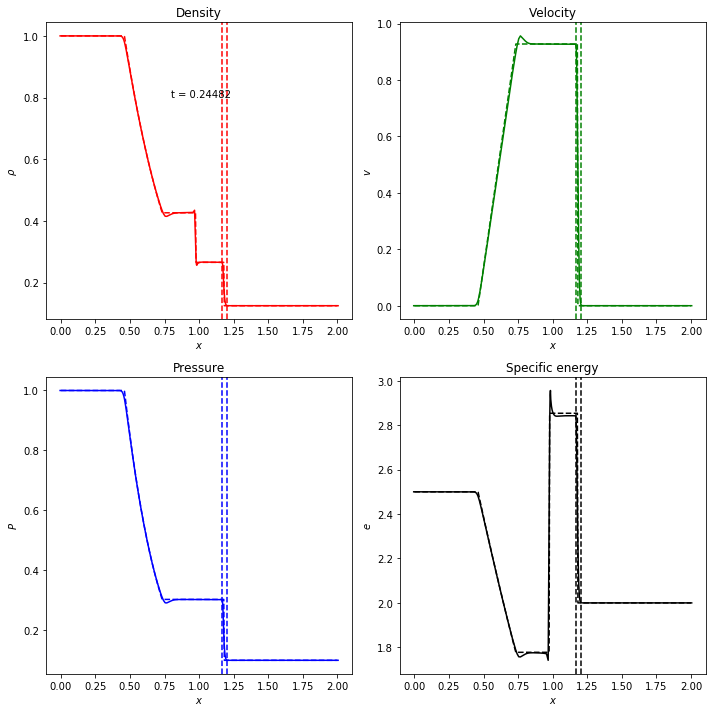

In [14]:
# N = 400.
t  = 0.0
dt = 0.0
q0 = 4.0; q1 = 0.5

cfl = 0.5
N_c = 400

fname = '/home/nina/Downloads/shock_N_400_q0_4_q1_05_C_05.png'

data = initialize(N_c, a, b, L1, rho_1, rho_2, p_1, p_2, gamma, v0, q0, q1)
t_vals = np.asarray([t])

while (t + dt) < 0.245:
    
    data_0 = data
    
    dt = calculate_dt(data_0, cfl)
    t, data_1 = get_update(data_0, gamma, q0, q1, t, dt)
     
    data = data_1
    np.append(t_vals, t)
    
make_plots(data, positions, values, t, fname)

shock at i = 117	 (i_L = 113,	 i_R = 123)
shock at x = 1.177	 (x_L = 1.157,	 x_R = 1.226)

LEFT:	 v :0.92287	 rho: 0.26466	 p:0.30069
CENTER:	 v :0.74482	 rho: 0.20531	 p:0.20865
RIGHT:	 v :0.01182	 rho: 0.12547	 p:0.10053

NUMERICAL SOLUTION:
JUMP:	 v :0.91105	 rho :0.13919	 p :0.20016

ANALYTIC SOLUTION:
JUMP:	 v :0.92745	 rho :0.14057	 p :0.20313

DIFFERENCE:
v_err = 0.01769	 rho_err = 0.00983	 p_err=0.01460


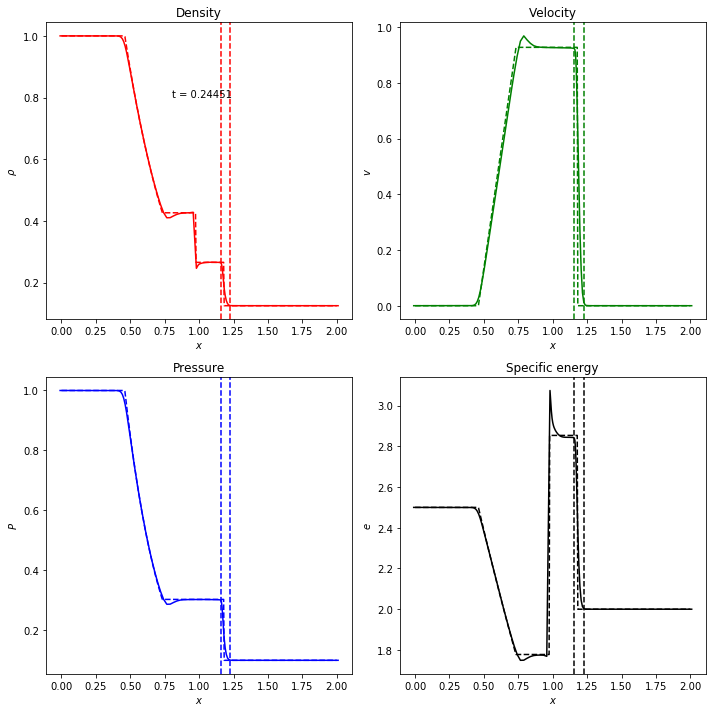

In [15]:
# Decrease CFL number to 0.25.
t  = 0.0
dt = 0.0
q0 = 4.0; q1 = 0.5

cfl = 0.25
N_c = 200

fname = '/home/nina/Downloads/shock_N_200_q0_4_q1_05_C_025.png'

data = initialize(N_c, a, b, L1, rho_1, rho_2, p_1, p_2, gamma, v0, q0, q1)
t_vals = np.asarray([t])

while (t + dt) < 0.245:
    
    data_0 = data
    
    dt = calculate_dt(data_0, cfl)
    t, data_1 = get_update(data_0, gamma, q0, q1, t, dt)
     
    data = data_1
    np.append(t_vals, t)
    
make_plots(data, positions, values, t, fname)

/home/nina/.local/lib/python3.6/site-packages/ipykernel_launcher.py:31: RuntimeWarning: invalid value encountered in sqrt
/home/nina/.local/lib/python3.6/site-packages/ipykernel_launcher.py:42: RuntimeWarning: invalid value encountered in greater


shock at i = 0	 (i_L = 0,	 i_R = 0)
shock at x = nan	 (x_L = nan,	 x_R = nan)

LEFT:	 v :nan	 rho: nan	 p:nan
CENTER:	 v :nan	 rho: nan	 p:nan
RIGHT:	 v :nan	 rho: nan	 p:nan

NUMERICAL SOLUTION:
JUMP:	 v :nan	 rho :nan	 p :nan

ANALYTIC SOLUTION:
JUMP:	 v :0.92745	 rho :0.14057	 p :0.20313

DIFFERENCE:
v_err = nan	 rho_err = nan	 p_err=nan


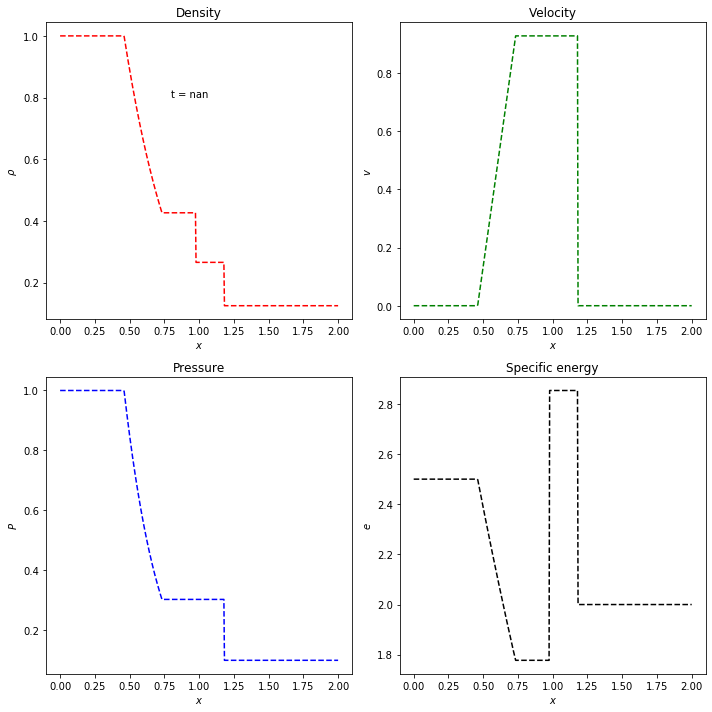

In [16]:
# Increase CFL number to 1.1
t  = 0.0
dt = 0.0
q0 = 4.0; q1 = 0.5

cfl = 1.1
N_c = 200

fname = '/home/nina/Downloads/shock_N_200_q0_4_q1_05_C_11.png'

data = initialize(N_c, a, b, L1, rho_1, rho_2, p_1, p_2, gamma, v0, q0, q1)
t_vals = np.asarray([t])

while (t + dt) < 0.245:
    
    data_0 = data
    
    dt = calculate_dt(data_0, cfl)
    t, data_1 = get_update(data_0, gamma, q0, q1, t, dt)
     
    data = data_1
    np.append(t_vals, t)
    
make_plots(data, positions, values, t, fname)